In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
data = pd.read_csv('creditcard.csv', on_bad_lines='skip')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65499 non-null  int64  
 1   V1      65499 non-null  float64
 2   V2      65499 non-null  float64
 3   V3      65499 non-null  float64
 4   V4      65499 non-null  float64
 5   V5      65499 non-null  float64
 6   V6      65499 non-null  float64
 7   V7      65499 non-null  float64
 8   V8      65499 non-null  float64
 9   V9      65499 non-null  float64
 10  V10     65499 non-null  float64
 11  V11     65499 non-null  float64
 12  V12     65499 non-null  float64
 13  V13     65499 non-null  float64
 14  V14     65499 non-null  float64
 15  V15     65499 non-null  float64
 16  V16     65499 non-null  float64
 17  V17     65499 non-null  float64
 18  V18     65499 non-null  float64
 19  V19     65499 non-null  float64
 20  V20     65499 non-null  float64
 21  V21     65499 non-null  float64
 22

In [18]:
print(data['Class'].value_counts())

Class
0    65330
1      169
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Class'])
plt.title('')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fc7f0139120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc7f01383a0> (for post_execute):


KeyboardInterrupt: 

In [20]:
X = data.drop('Class', axis=1)
#X = X.interpolate()
y = data['Class']
#y = y.interpolate()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_trains, y_trains = smt.fit_resample(X_train, y_train)

In [21]:
print(len(X))

65499


In [38]:
from imblearn.ensemble import BalancedRandomForestClassifier

classifier = BalancedRandomForestClassifier().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [39]:
y_pred = classifier.predict(X_test)

df = pd.DataFrame(y_pred)
df.value_counts()

0    12898
1      202
Name: count, dtype: int64

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12893   169]
 [    5    33]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13062
           1       0.16      0.87      0.28        38

    accuracy                           0.99     13100
   macro avg       0.58      0.93      0.63     13100
weighted avg       1.00      0.99      0.99     13100



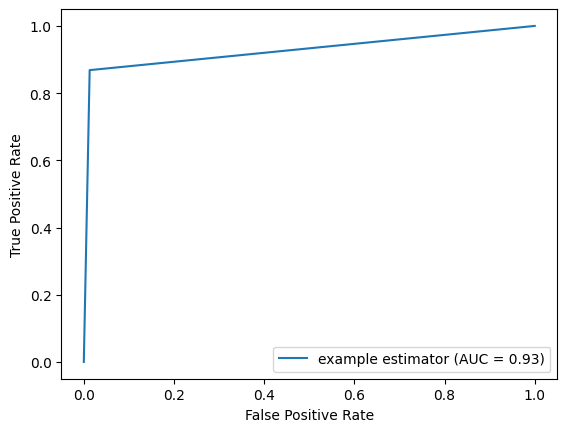

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

plt.show()

In [11]:
estimator = classifier.estimators_[5]

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False,
                precision = 2, filled = True)

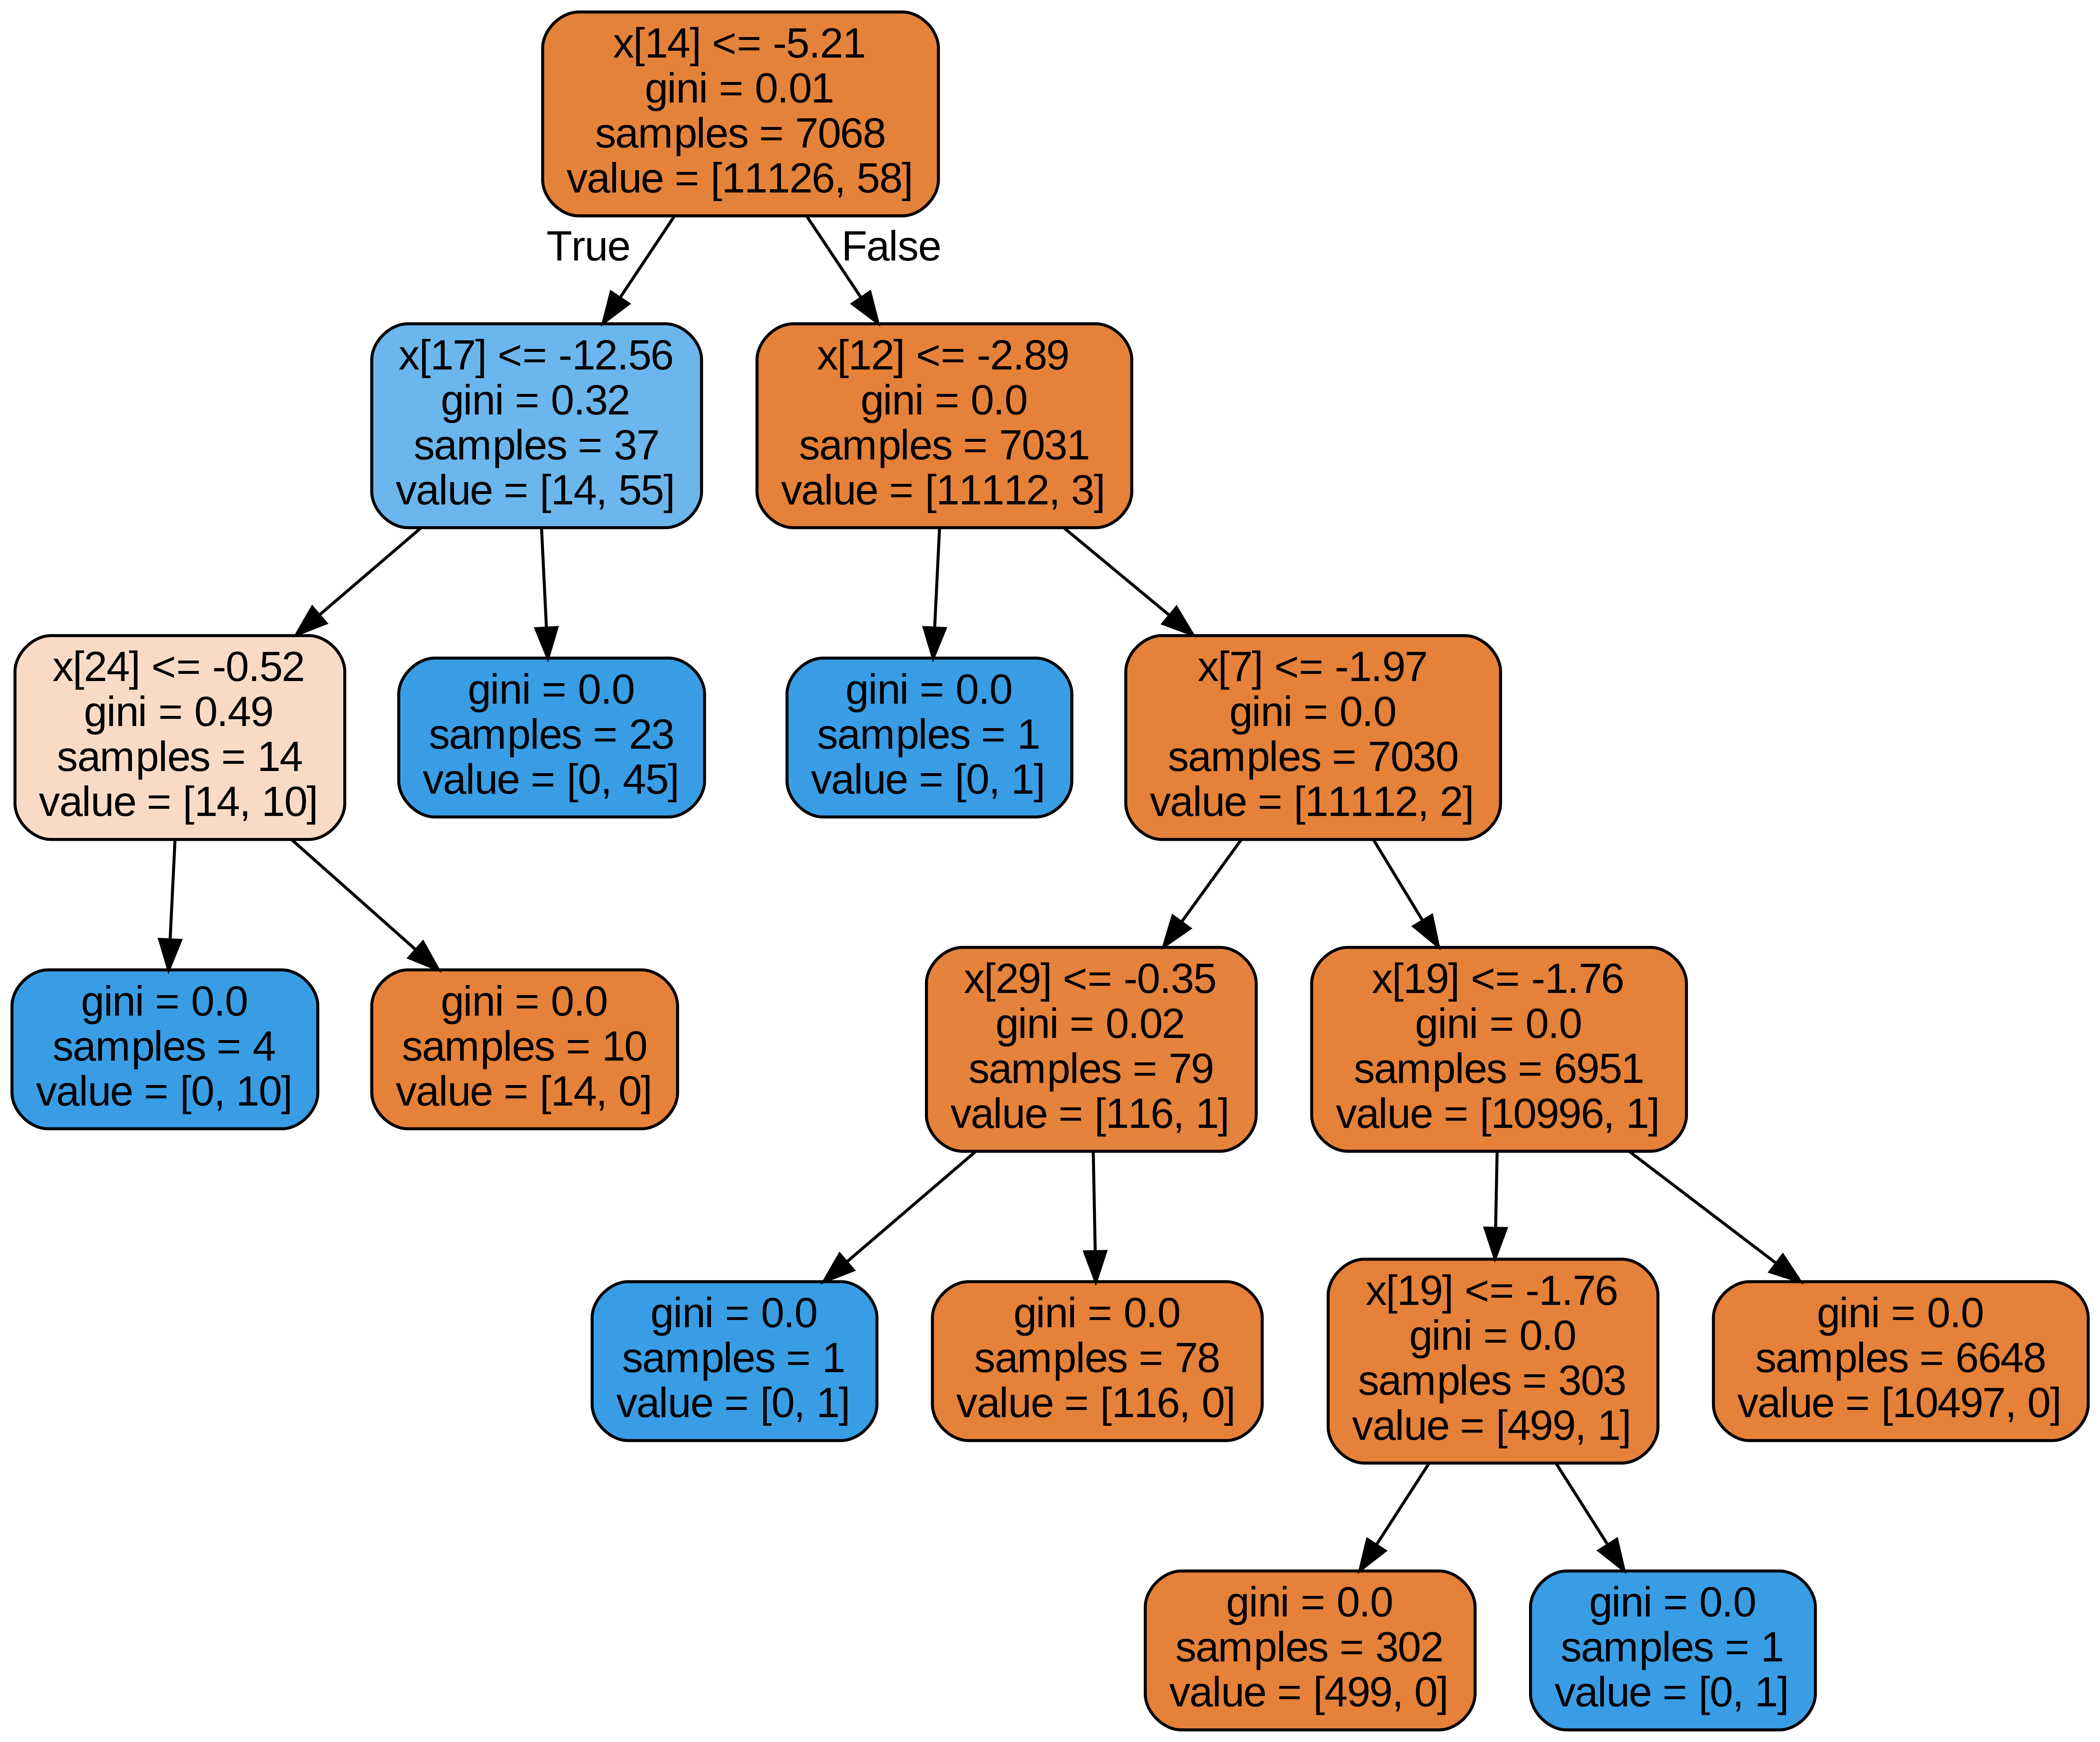

In [12]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [42]:
y_prob_train = classifier.predict_proba(X_train)[:,1]
y_prob_test = classifier.predict_proba(X_test)[:,1]
print(y_prob_test)

[0.36 0.06 0.48 ... 0.04 0.15 0.01]


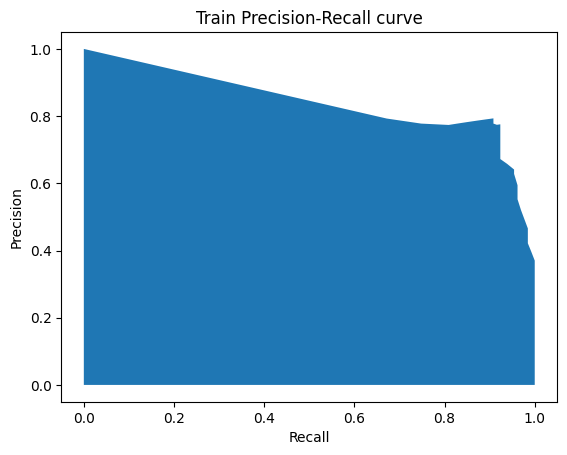

In [43]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [44]:
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(pr_auc)

0.8415049126183829
